Original Author: Lisa Bryan

Modified to include additional information and simplified code: Antonio Ortiz
# Intent of the application

The purpose of this application is to explore clustering techniques, as well as a dimensionality reduction technique (Principal Component Analysis) and compare the results in a dataframe where the reduction technique was applied and a dataframe where it was not applied. 

# Dataset to be used, including source

The dataset to be used is the Iris dataset, for which more information can be found here: https://www.ritchieng.com/machine-learning-iris-dataset/

# Mathematical background
## Elbow Method

Clustering is a technique used in Data Mining to split the observations in a dataset into multiple groups. 
One of the most used methods for this is K-means, which consists in splitting n observations into k clusters, according to their mean. 
The elbow method is one of the most used methods to determine K. It is a graphical method, in which the percentage of explained variation is plotted as a function of the number of clusters. When an "elbow" is formed in the plot, that is the number of clusters that should be used. 

## Principal Component Analysis (PCA)

Dimensionality reduction method to reduce the dimensionality (variables) of large datasets, while preserving its most essential information. 
It is used to reduce the complexity of algorithms, while sacrificing as little accuracy as possible. 
It can also help to reduce the noise in the data. 

## K-means

The main objective of the k-means clustering technique is to split n observations from a dataset into k clusters, using the nearest mean (cluster center) as the criteria. The mean used as the criteria depends on the observations and their features. The k comes from the previously described term, the Elbow Method. 
The mean used as the criteria gets updated with each observation that gets added to the cluster, making the mean a more “accurate” mean. 

##DBSCAN

Stands for Density-Based Spatial Clustering of Applications with Noise. It is a Density-based clustering algorithm. 
This algorithm has two differences with the previous algorithm: 
It does not need a previously calculated K for the number of clusters, as they will be automatically chosen.
It does not take into consideration the features themselves, but how close some observations are to others. 
It requires two arguments: minimum number of points, and epsilon, which is the “radius” of the “circle” where the observations are densely packed. 
This algorithm creates a circle of radius epsilon around each observation and counts how many observations are around it. If there are at least as much as the minimum number of points, then this observation is a core observation. If there are fewer, then it is just a border observation. 
If there are no other observations close to it, then it is considered noise. 

## Gaussian Mixture Model

This algorithm takes the number of clusters, in this case, K. 
It assumes that every observation is generated from a mixture of a finite number of Gaussian distributions with unknown parameters. 
Each of these distributions is a cluster. So, this algorithm gathers every observation that belongs to the same Gaussian distribution. 

## Agglomerative Hierarchical Clustering

Most common type of hierarchical clustering. Also known as AGNES (Agglomerative Nesting). 
It works by assigning each observation to a single cluster made of a single element. 
Then the clusters get merged into the closest cluster repeatedly, until every observation is inside one single cluster. 
By performing this action, the result is a tree-based representation of the dataset, which is known as a dendrogram. 
It is considered a bottom-up algorithm. It is the opposite of a divisive algorithm, which starts with a single cluster for every observation, then splits them repeatedly until every observation is in their own cluster, where the cluster is made of a single element. 
As the previous algorithm, it uses the distance between the observations to create the distributions or the clusters. The distance can be the Euclidean distance. 

## Affinity Propagation

Algorithm that identifies exemplars among data points and forms clusters of data points around these exemplars. It does not require for the number of clusters to be previously defined. Every observation is a potential exemplar, and it exchanges messages between the observations to determine which observations are good exemplars, and the number of clusters these generate. 
The messages tell the other observations how good of an exemplar it is, and they decide if it is the best exemplar. 
All points with the same exemplar are placed in the same cluster. 


## Mean Shift Clustering

This unsupervised algorithm does not require for the clusters to be previously defined. Particularly useful when clusters are not well defined and separated by linear boundaries, but mixed shaped. 
It basically "shifts" the observations towards the mean (regional) iteratively, and the destination of each observation is the cluster to which it belongs. 
Some of the advantages are that it is robuts to outliers, and it does not assume a pre-defined shape. 
However, it is very computationally expensive, and does not scale well. 

## Spectral Clustering

Algorithm that uses the spectrum (eigenvalues) of the similarity matrix of the data to perform dimensaionlity reduction before clustering the observations. 

## OPTICS Clustering

OPTICS stands for Ordering Points to Identify the Clustering Structure. 
Density based algorithm, similar to DBSCAN. 
It requires two parameters: epsilon, which determines the maximum distance to consider, and minpts, which would be the number of points required to consider an agglomeration as a cluster. 
It is very similar to DBSCAN, but it fixes one thing: It can detect meaningful clusters in data of varying density. 


## BIRCH Clustering

Balanced Iterative Reducing and Clustering using Hierarchies.
Unsupervised algorithm. 
It first performs a dimension reduction technique to work on the reduced dataset. 
It works with dendrograms, and easily removes outliers. It splits the observations into multiple subclusters, and slowly builds up to a larger one using different clustering algorithms. 


# Use case

This application can be used to demonstrate the usefulness of both clustering techniques and dimensionality reduction technique with a well-known dataset, which would allow for easy reproduction. 
This application is used to show the differences in clustering techniques, their advantages, disadvantages, requirements, implementation, and the difference that using PCA can have in the analysis of a dataset. 

# Variables

Sepal.Length: The length of the sepal, which is the outer part of the flower that encloses a developing bud. 
Sepal.Width: The width of the sepal.
Petal.Length: The length of the petal of the flower, which are leaves that surround the reproductive parts of a flower. 
Petal.Width: The width of the petal of the flower. 

# Labels

Species: Describes the species of the flower associated to the previous measurements. 

# Data import

In this application, there is no input needed from the user.

## Proposed Libraries

Seaborn: Data visualization library based on matplotlib. Source: https://seaborn.pydata.org/. Version: 0.11.2
Matplotlib: Library for creating static, animated, and interactive visualizations in Python. Source:3.7.2 https://matplotlib.org/stable/users/release_notes.html.
Sklearn: Machine learning tool for predictive data analysis. Supports both supervised and unsupervised learning. Version: 1.0.2
Source -> https://scikit-learn.org/stable/getting_started.html
Scipy: Provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics and others. Version: 1.11.1
Source -> https://scipy.org/install/
hdbscan: It performs the HDBSCAN algorithm. Version: 0.8.30 Source -> https://pypi.org/project/hdbscan/
Numpy: Used for vectorization and indexing for scientific computing. Version: 1.25.1 Source -> https://github.com/numpy/numpy
Pandas: Data analysis and data manipulation library. Version: 2.0.3 Source -> https://pandas.pydata.org/getting_started.html

In [1]:
#! pip install hdbscan
#! pip install scipy

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import OPTICS,Birch,DBSCAN,SpectralClustering,MeanShift, \
                            estimate_bandwidth,AgglomerativeClustering,AffinityPropagation,\
                            KMeans
# load decomposition to do PCA analysis with sklearn
from sklearn import datasets, decomposition
from sklearn.decomposition import PCA
import hdbscan

In [3]:
iris = sns.load_dataset('iris')

# convert species (catagorical) to numerical
le = LabelEncoder().fit(iris['species'])
iris['species'] = le.transform(iris['species'])

# species has been converted to numerical values
# Create a value map for reference
map = list(le.inverse_transform(iris['species']))
mapDict = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapDict)

{'setosa': 0, 'versicolor': 1, 'virginica': 2}


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Scatter plot of iris dataset

Distribute the dataset into two components for PCA analysis

In [5]:
X = pd.DataFrame(iris, columns = ['sepal_length','sepal_width','petal_length','petal_width'])
y = pd.DataFrame(iris, columns = ['species'])
X.shape, y.shape

((150, 4), (150, 1))

PCA using all features

In [6]:
pca_4 = PCA(n_components=4, random_state=42).fit(X)
X_pca4 = pca_4.transform(X)
X_pca4.shape

(150, 4)

Create a Scree plot of the eigenvalues to determine the optimal number of features for PCA

Text(0.5, 1.0, 'Scree Plot')

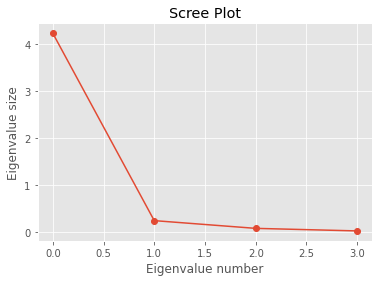

In [7]:
plt.style.use("ggplot")
plt.plot(pca_4.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

PCA analysis using 2 features as determined by the Scree plot       Create a dataframe of results

In [8]:
pca = PCA(n_components=2, random_state=42).fit(X)
X_pca = pca.transform(X)
pca_df = pd.DataFrame(X_pca, columns=['Feature_1','Feature_2'])

PCA scatter plot

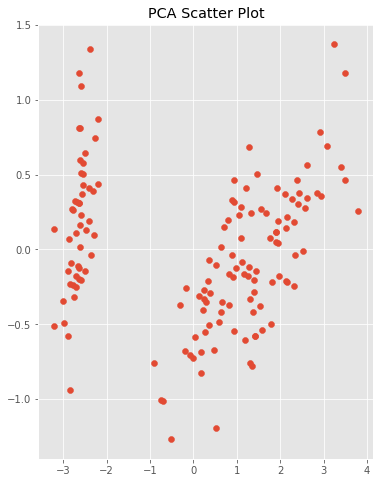

In [9]:
plt.figure(figsize=(6,8))
plt.title("PCA Scatter Plot")
plt.scatter(pca_df['Feature_1'],pca_df['Feature_2'])

Kmeans Elbow plots:

A method to determine the number of clusters to uses in analyzing a data set.

1. Full Data
2. PCA

/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly 

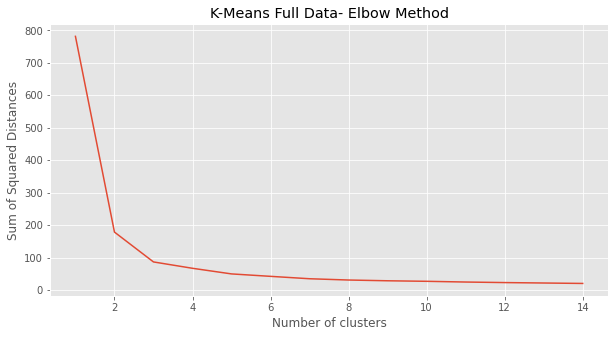

In [10]:
sum_sqrd_full = []
for k in range(1,15):
    kmeans = KMeans(n_clusters = k, init='k-means++',random_state=0)
    kmeans.fit(iris)
    sum_sqrd_full.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1,15),sum_sqrd_full)
plt.savefig("Elbow Method.png", transparent=False)
plt.title("K-Means Full Data- Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [11]:
# As we can see in our plot, the optimal number of clusters is 3. 
# This makes sense when taking into consideration our dataset, as there are a total of 3 labels: Virginica, Versicolor, and Setosa. 

/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly 

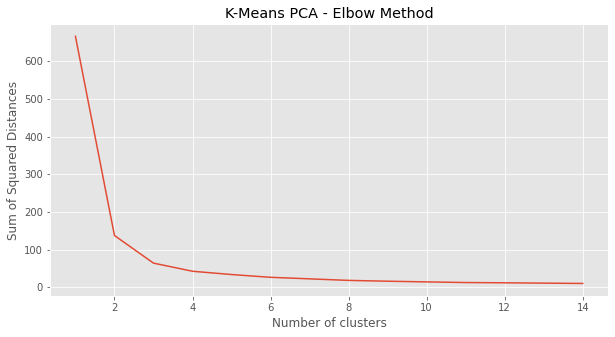

In [12]:
sum_sqrd_pca = []
for k in range(1,15):
    kmeans = KMeans(n_clusters = k, init='k-means++', random_state=42)
    kmeans.fit(pca_df)
    sum_sqrd_pca.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1,15),sum_sqrd_pca)
plt.title("K-Means PCA - Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

By the Elbow Method:
 3 clusters should be chosen for the full data and for PCA

Scatter plot of full dataset

[Text(0.5, 1.0, 'Full Iris Dataset Scatter Plot')]

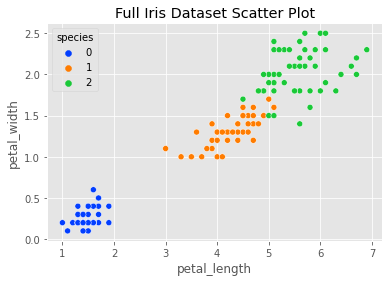

In [13]:
sns.scatterplot(data=iris, x="petal_length",
                y="petal_width", hue="species", palette='bright').set(title="Full Iris Dataset Scatter Plot")

Scatter plot of full dataset kmeans

/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


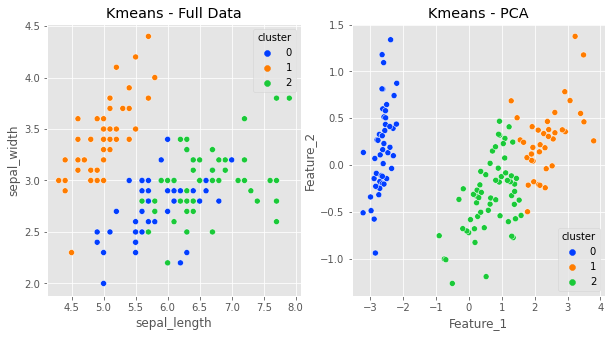

In [14]:
k = 3
iris_res = iris.copy()
iris_res['cluster'] = KMeans(n_clusters = k, random_state = 0).fit_predict(iris)

pca_df_res = pca_df.copy()
pca_df_res['cluster'] = KMeans(n_clusters = k, random_state = 0).fit_predict(pca_df)

# subplot 1 row, 2 columns
fig,(ax1,ax2) = plt.subplots(1, 2,sharex=False, sharey=False, figsize=(10,5))

sns.scatterplot(data=iris_res,x="sepal_length",y='sepal_width', hue='cluster',
                palette='bright',ax=ax1).set(title='Kmeans - Full Data')
plt.savefig("K-means Full data.png", transparent=False)
sns.scatterplot(data=pca_df_res,x="Feature_1",y="Feature_2", hue='cluster', 
                palette='bright', ax=ax2).set(title='Kmeans - PCA')
plt.savefig("K-means PCA.png", transparent=False)

Scatter plot of PCA kmeans

In [15]:
iris_res["pres"] = iris["species"] == iris_res['cluster']
print(iris_res.pres.value_counts())
pca_df_res["pres"] = iris["species"] == pca_df_res['cluster']
print(pca_df_res.pres.value_counts())

pres
False    101
True      49
Name: count, dtype: int64
pres
False    83
True     67
Name: count, dtype: int64


As we can see, after using PCA the precision increased for the clustering predictions. 
Therefore, using PCA for K-means

Affinity Propagation  

 Each data point sends all other data points a message with it the point's relative attractiveness to other point.  The receiving data points return messages with the availabity to associate. As soon as a point is associated with another point, it becomes the 'exemplar'. This continues until a consensus is reached and all points with the same exemplar become a cluster.  The number of clusters is predicted by the algorithm.

Number of predicted clusters full data: 7
Number of predicted clusters PCA: 8


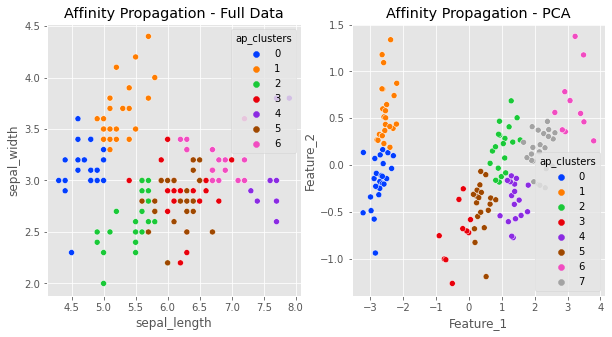

In [16]:
# Full dataset
ap = AffinityPropagation()
ap_clusters = ap.fit_predict(iris)
iris['ap_clusters'] = ap_clusters
print ("Number of predicted clusters full data: " + str(len(ap.cluster_centers_)))

# PCA reduced data
ap = AffinityPropagation()
ap_clusters = ap.fit_predict(pca_df)
pca_df['ap_clusters'] = ap_clusters
print ("Number of predicted clusters PCA: " + str(len(ap.cluster_centers_)))

# subplot 1 row, 2 columns
fig,(ax1,ax2) = plt.subplots(1, 2,sharex=False, sharey=False, figsize=(10,5))

sns.scatterplot(data=iris,x="sepal_length",y='sepal_width', 
                hue='ap_clusters',palette='bright', ax=ax1).set(title="Affinity Propagation - Full Data")
plt.savefig("Affinity Propagation Full Data.png", transparent=False)
iris.drop(iris.columns[[5]],axis=1, inplace=True)

sns.scatterplot(data=pca_df,x="Feature_1",y="Feature_2", 
                hue='ap_clusters',palette='bright',ax=ax2).set(title="Affinity Propagation - PCA")
plt.savefig("Affinity Propagation PCA.png", transparent=False)

pca_df.drop(pca_df.columns[[2]],axis=1,inplace=True)

Dendrogram

Heirarchial method to work out the best way to allocate odjects to a cluster represented as a tree.  The leaves of the tree are clusters of only 1 sample thus a complete dendrogram is difficult to read at best. The length of the line represents the distance between the child clusters.  Dendrograms are useful in determining the possible number of clusters.

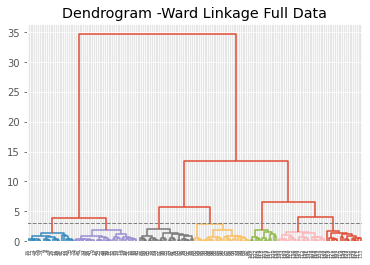

In [17]:
# Full dataset
x1 = linkage(iris,method='ward')
dendrogram(x1,color_threshold=k)
plt.axhline(y=k, c='grey', lw=1, linestyle='dashed')
plt.title("Dendrogram -Ward Linkage Full Data")
plt.savefig("Dendrogram -Ward Linkage Full Data.png", transparent=False)

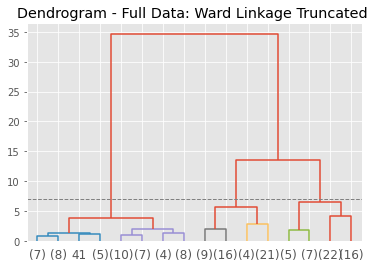

In [18]:
# Full data
x2 = linkage(iris,method='ward')
dendrogram(x2,truncate_mode='level',p=3,color_threshold=3)
plt.axhline(y=7, c='grey', lw=1, linestyle='dashed')
plt.title("Dendrogram - Full Data: Ward Linkage Truncated ")
plt.savefig("Dendrogram - Full Data: Ward Linkage Truncated.png", transparent=False)

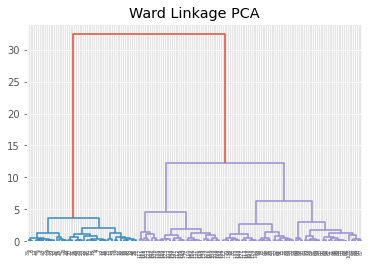

In [19]:
# PCA reduced
x3 = linkage(pca_df,metric='euclidean',method='ward')
dendrogram(x3)
plt.title("Ward Linkage PCA")
plt.savefig("Ward Linkage PCA.png", transparent=False)

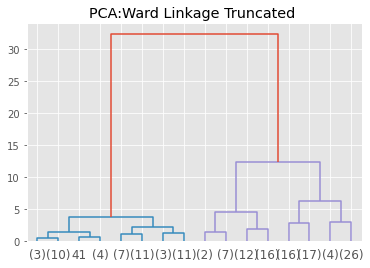

In [20]:
x4 = linkage(pca_df,method='ward')
dendrogram(x4,truncate_mode='level',p=3)
plt.title("PCA:Ward Linkage Truncated ")
plt.savefig("PCA-Ward Linkage Truncated.png", transparent=False)

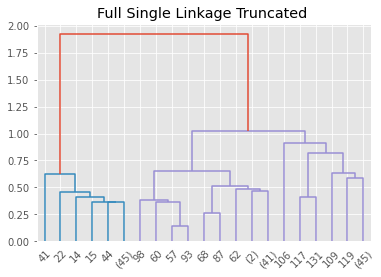

In [21]:
x5 = linkage(iris,method='single')
dendrogram(x5,truncate_mode='level',p=5)
plt.title("Full Single Linkage Truncated ")
plt.savefig("Full Single Linkage Truncated.png", transparent=False)

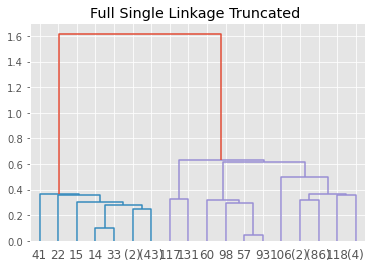

In [22]:
x6 = linkage(pca_df,method='single')
dendrogram(x6,truncate_mode='level',p=5)
plt.title("Full Single Linkage Truncated ")
plt.savefig("PCA Single Linkage Truncated.png", transparent=False)

Agglomerative Clustering

Hierarchial clustering method which groups items based on similarity. Beginning with single samples, pairs are merged until all samples are contained in the number of clusters specified by the user.

In [23]:
help(AgglomerativeClustering)

Help on class AgglomerativeClustering in module sklearn.cluster._agglomerative:

class AgglomerativeClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  AgglomerativeClustering(n_clusters=2, *, affinity='deprecated', metric=None, memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)
 |  
 |  Agglomerative Clustering.
 |  
 |  Recursively merges pair of clusters of sample data; uses linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int or None, default=2
 |      The number of clusters to find. It must be ``None`` if
 |      ``distance_threshold`` is not ``None``.
 |  
 |  affinity : str or callable, default='euclidean'
 |      The metric to use when calculating distance between instances in a
 |      feature array. If metric is a string or callable, it must be one of
 |      the options allowed by :func:`sklearn

/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


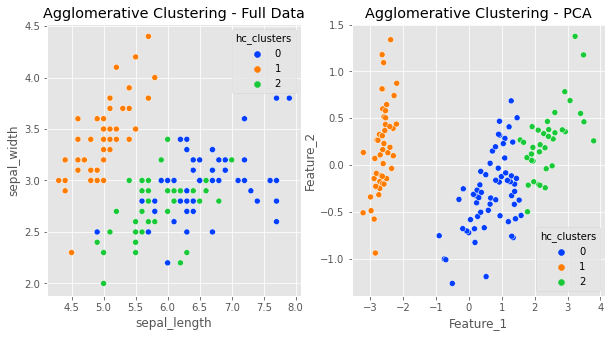

In [24]:
# Full dataset
iris_res = iris.copy()
hc = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
hc_clusters = hc.fit_predict(iris)
iris_res['hc_clusters'] = hc_clusters

# PCA reduced data
pca_df_res = pca_df.copy()
hc = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
hc_clusters = hc.fit_predict(pca_df)
pca_df_res['hc_clusters'] = hc_clusters

# subplot 1 row, 2 columns
fig,(ax1,ax2) = plt.subplots(1, 2,sharex=False, sharey=False, figsize=(10,5))

sns.scatterplot(data=iris_res,x="sepal_length",y='sepal_width', 
                hue='hc_clusters',palette='bright',ax=ax1).set(title="Agglomerative Clustering - Full Data")
plt.savefig("Agglomerative Clustering - Full Data.png", transparent=False)
sns.scatterplot(data=pca_df_res,x="Feature_1",y='Feature_2', 
                hue='hc_clusters',palette='bright',ax=ax2).set(title="Agglomerative Clustering - PCA")
plt.savefig("Agglomerative Clustering - PCA.png", transparent=False)

Mean Shift Clustering Method

Centroid based algorithm which uses the mean of the points within a given region to determine each cluster.  Bandwidth is the size of the region used to calculate the mean of the points. The number of clusters is estimated by the algorithm.

Bandwidth value: 0.9714028141871647
Number of predicted clusters: 3
Bandwidth value: 0.7830011644595651
Number of predicted clusters: 3


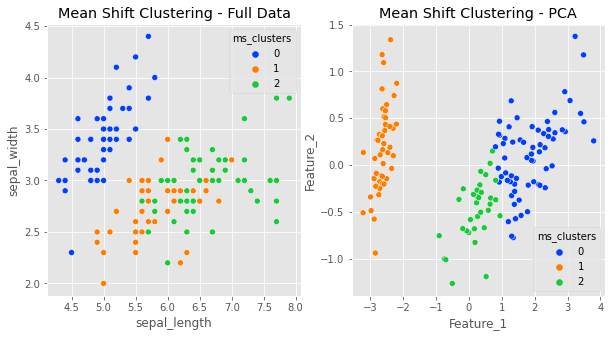

In [25]:
# Full dataset
iris_res = iris.copy()
bandwidth = estimate_bandwidth(iris, quantile=0.2, n_samples=len(iris))
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_clusters = ms.fit_predict(iris)
iris_res['ms_clusters'] = ms_clusters
print ("Bandwidth value: " + str(bandwidth))
print ("Number of predicted clusters: " + str(len(ms.cluster_centers_)))

#PCA reduced data
pca_df_res = pca_df.copy()
bandwidth = estimate_bandwidth(pca_df, quantile=0.2, n_samples=len(pca_df))
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_clusters = ms.fit_predict(pca_df)
pca_df_res['ms_clusters'] = ms_clusters

print ("Bandwidth value: " + str(bandwidth))
print ("Number of predicted clusters: " + str(len(ms.cluster_centers_)))

# subplot 1 row, 2 columns
fig,(ax1,ax2) = plt.subplots(1, 2,sharex=False, sharey=False, figsize=(10,5))

sns.scatterplot(data=iris_res,x="sepal_length",y='sepal_width', 
                hue='ms_clusters',palette='bright',ax=ax1).set(title="Mean Shift Clustering - Full Data")
plt.savefig("Mean Shift Clustering - Full Data.png", transparent=False)
sns.scatterplot(data=pca_df_res,x="Feature_1",y='Feature_2', 
                hue='ms_clusters',palette='bright',ax=ax2).set(title="Mean Shift Clustering - PCA")
plt.savefig("Mean Shift Clustering - PCA.png", transparent=False)

Spectral Clustering Method

The data points are the nodes of a graph and are grouped into clusters based on similarity. Points in different clusters are considered to be different from each other. User defines the number of clusters.

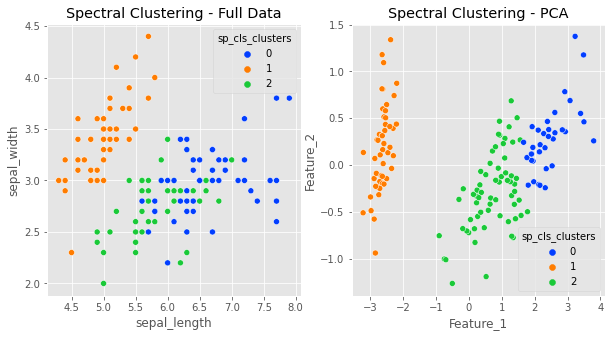

In [26]:
#1 Full dataset
sp_cls = SpectralClustering(n_clusters = 3, random_state=0)
sp_cls_clusters = sp_cls.fit_predict(iris)
iris['sp_cls_clusters'] = sp_cls_clusters

# PCA reduced data
sp_cls = SpectralClustering(n_clusters = 3, random_state=0)
sp_cls_clusters = sp_cls.fit_predict(pca_df)
pca_df['sp_cls_clusters'] = sp_cls_clusters

# subplot 1 row, 2 columns
fig,(ax1,ax2) = plt.subplots(1, 2,sharex=False, sharey=False, figsize=(10,5))

sns.scatterplot(data=iris,x="sepal_length",y='sepal_width',
                hue='sp_cls_clusters', palette='bright',ax=ax1).set(title="Spectral Clustering - Full Data")
plt.savefig("Spectral Clustering - Full Data.png", transparent=False)
iris.drop(iris.columns[[5]],axis=1, inplace=True)

sns.scatterplot(data=pca_df,x="Feature_1",y='Feature_2', 
                hue='sp_cls_clusters',palette='bright',ax=ax2).set(title="Spectral Clustering - PCA")
plt.savefig("Spectral Clustering - PCA.png", transparent=False)
pca_df.drop(pca_df.columns[[2]],axis=1,inplace=True)

Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

High density regions are grouped together based on points that are closely packed together. Points in low density areas which lie alone are marked as outliers or noise (-1).

Number of predicted clusters: 3
Number of predicted clusters: 2


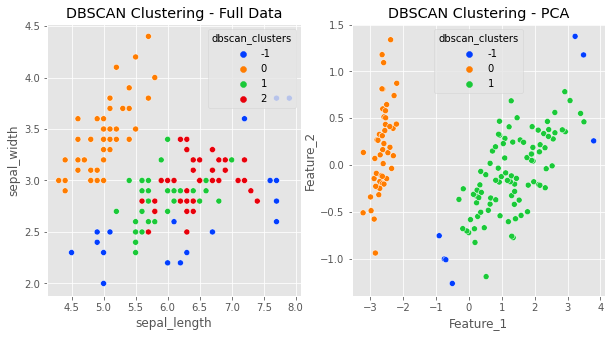

In [27]:
# Full dataset
dbscan = DBSCAN(.5, metric='euclidean')
dbscan_clusters = dbscan.fit_predict(iris)
iris['dbscan_clusters'] = dbscan_clusters
labels = dbscan.labels_
# Number of clusters, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print ("Number of predicted clusters: " + str(n_clusters_))

# PCA reduced data
dbscan = DBSCAN(eps=0.5, metric='euclidean')
dbscan_clusters = dbscan.fit_predict(pca_df)
pca_df['dbscan_clusters'] = dbscan_clusters
labels = dbscan.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print ("Number of predicted clusters: " + str(n_clusters_))

# subplot 1 row, 2 columns
fig,(ax1,ax2) = plt.subplots(1, 2,sharex=False, sharey=False, figsize=(10,5))

sns.scatterplot(data=iris,x="sepal_length",y='sepal_width', 
                hue='dbscan_clusters', palette='bright',ax=ax1).set(title="DBSCAN Clustering - Full Data")
plt.savefig("DBSCAN Clustering - Full Data.png", transparent=False)
iris.drop(iris.columns[[5]],axis=1, inplace=True)

sns.scatterplot(data=pca_df,x="Feature_1",y='Feature_2', 
                hue='dbscan_clusters',palette='bright',ax=ax2).set(title="DBSCAN Clustering - PCA")
plt.savefig("DBSCAN Clustering - PCA.png", transparent=False)
pca_df.drop(pca_df.columns[[2]],axis=1,inplace=True)

Ordering Points To Identify the Clustering Structure (OPTICS)

Another high density clustering method which, unlike DBSCAN, can accomodate clusters of variable data densities.  Outliers or noise is also idenfied as -1.  The number of clusters is determined by the method.

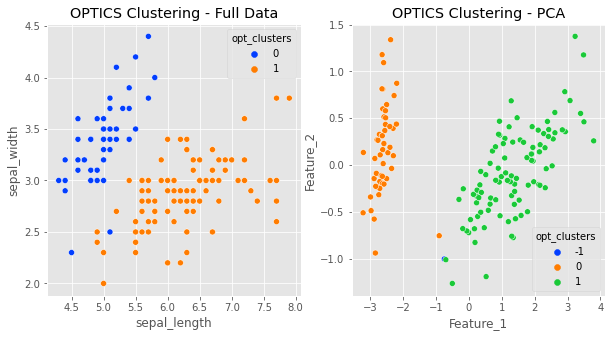

In [28]:
# Full dataset
opt = OPTICS(min_samples=50, xi=.05, min_cluster_size=.05, cluster_method='xi', metric='minkowski', algorithm = 'auto')
opt_clusters = opt.fit_predict(iris)
iris['opt_clusters'] = opt_clusters

# PCA reduced data
opt = OPTICS(min_samples=50, xi=.05,min_cluster_size=.05, cluster_method='xi',metric='minkowski', algorithm = 'auto')
opt_clusters = opt.fit_predict(pca_df)
pca_df['opt_clusters'] = opt_clusters

# subplot 1 row, 2 columns
fig,(ax1,ax2) = plt.subplots(1, 2,sharex=False, sharey=False, figsize=(10,5))

sns.scatterplot(data=iris,x="sepal_length",y='sepal_width', hue='opt_clusters',
                palette='bright',ax=ax1).set(title="OPTICS Clustering - Full Data")
plt.savefig("OPTICS Clustering - Full Data.png", transparent=False)

iris.drop(iris.columns[[5]],axis=1, inplace=True)

sns.scatterplot(data=pca_df,x="Feature_1",y='Feature_2', hue='opt_clusters',
                palette='bright',ax=ax2).set(title="OPTICS Clustering - PCA")
plt.savefig("OPTICS Clustering - PCA.png", transparent=False)

pca_df.drop(pca_df.columns[[2]],axis=1,inplace=True)

Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH) Clustering Method:

Generates a small compact summary of the dataset which retains as much information as possible. The summary of the data is then clustered. User defines the number of custers.


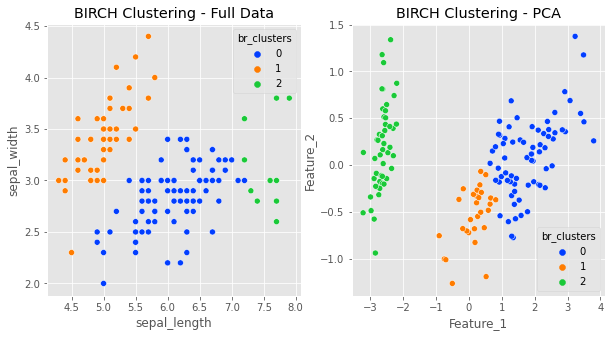

In [29]:
# Full dataset
br = Birch(n_clusters=3)
br_clusters = br.fit_predict(iris)
iris['br_clusters'] = br_clusters

# PCA reduced dataset
br = Birch(n_clusters=3)
br_clusters = br.fit_predict(pca_df)
pca_df['br_clusters'] = br_clusters

# subplot 1 row, 2 columns
fig,(ax1,ax2) = plt.subplots(1, 2,sharex=False, sharey=False, figsize=(10,5))

sns.scatterplot(data=iris,x="sepal_length",y='sepal_width', hue='br_clusters',
                palette='bright',ax=ax1).set(title="BIRCH Clustering - Full Data")
plt.savefig("BIRCH Clustering - Full Data.png", transparent=False)

iris.drop(iris.columns[[5]],axis=1, inplace=True)

sns.scatterplot(data=pca_df,x="Feature_1",y='Feature_2', hue='br_clusters',
                palette='bright',ax=ax2).set(title="BIRCH Clustering - PCA")
plt.savefig("BIRCH Clustering - PCA.png", transparent=False)

pca_df.drop(pca_df.columns[[2]],axis=1,inplace=True)

Hierarchical Density-Based Spatial Clustering Method

This method extends DBSCAN. DBSCAN is converted to a heirarchical algorithm then employs a technique to extract a flat cluster based on the stability of the clusters. Any point not in a cluster is considered to be noise. The user determines the minimum number of observations in a cluster or cluster size.


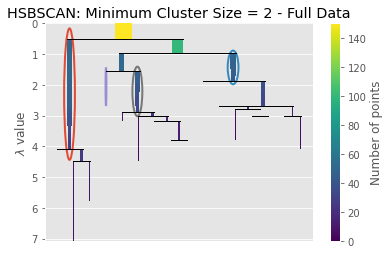

In [30]:
clusterer1 = hdbscan.HDBSCAN(min_cluster_size=2)
labels = clusterer1.fit(iris)
#Condense and extract the clusters
clusterer1.condensed_tree_.plot(select_clusters=True, 
                                selection_palette=sns.color_palette()).set(title="HSBSCAN: Minimum Cluster Size = 2 - Full Data")
plt.savefig("HSBSCAN - Minimum Cluster Size = 2 - Full Data.png", transparent=False)

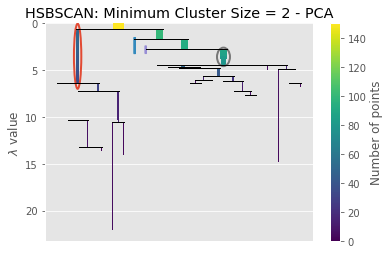

In [31]:
labels = clusterer1.fit(pca_df)
#Condense and extract the clusters
clusterer1.condensed_tree_.plot(select_clusters=True, 
                                selection_palette=sns.color_palette()).set(title="HSBSCAN: Minimum Cluster Size = 2 - PCA")
plt.savefig("HSBSCAN - Minimum Cluster Size = 2 - PCA.png", transparent=False)

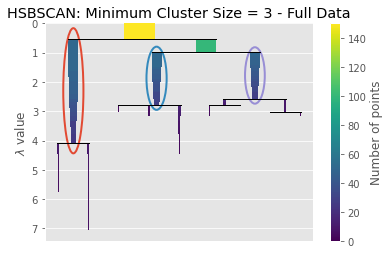

In [32]:
clusterer2 = hdbscan.HDBSCAN(min_cluster_size=3)
labels = clusterer2.fit(iris)
#Condense and extract the clusters
clusterer2.condensed_tree_.plot(select_clusters=True, 
                                selection_palette=sns.color_palette()).set(title="HSBSCAN: Minimum Cluster Size = 3 - Full Data")
plt.savefig("HSBSCAN - Minimum Cluster Size = 3 - Full Data.png", transparent=False)

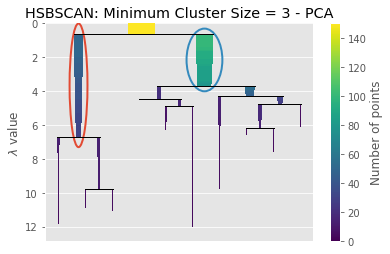

In [33]:
labels = clusterer2.fit(pca_df)
#Condense and extract the clusters
clusterer2.condensed_tree_.plot(select_clusters=True, 
                                selection_palette=sns.color_palette()).set(title="HSBSCAN: Minimum Cluster Size = 3 - PCA")
plt.savefig("HSBSCAN - Minimum Cluster Size = 3 - PCA.png", transparent=False)

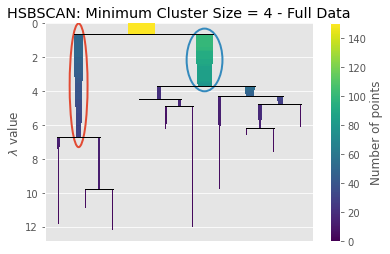

In [34]:
clusterer3 = hdbscan.HDBSCAN(min_cluster_size=4)
labels = clusterer3.fit(iris)
#Condense and extract the clusters
clusterer2.condensed_tree_.plot(select_clusters=True, 
                                selection_palette=sns.color_palette()).set(title="HSBSCAN: Minimum Cluster Size = 4 - Full Data")
plt.savefig("HSBSCAN - Minimum Cluster Size = 4 - Full Data.png", transparent=False)

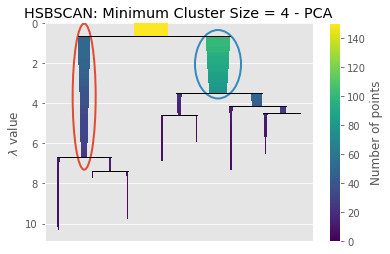

In [35]:
labels = clusterer3.fit(pca_df)
#Condense and extract the clusters
clusterer3.condensed_tree_.plot(select_clusters=True, 
                                selection_palette=sns.color_palette()).set(title="HSBSCAN: Minimum Cluster Size = 4 - PCA")
plt.savefig("HSBSCAN - Minimum Cluster Size = 4 - PCA.png", transparent=False)

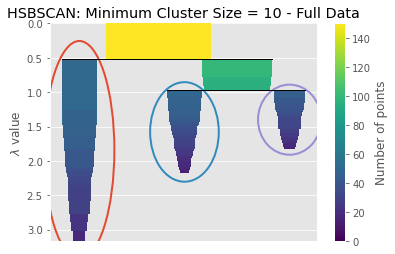

In [36]:
clusterer4 = hdbscan.HDBSCAN(min_cluster_size=10)
labels = clusterer4.fit(iris)
#Condense and extract the clusters
clusterer4.condensed_tree_.plot(select_clusters=True,
                                selection_palette=sns.color_palette()).set(title="HSBSCAN: Minimum Cluster Size = 10 - Full Data")
plt.savefig("HSBSCAN - Minimum Cluster Size = 10 - Full Data.png", transparent=False)

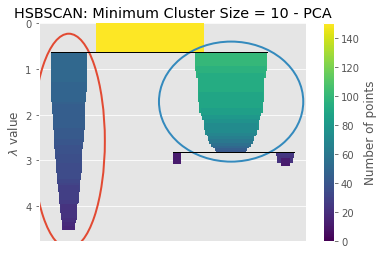

In [37]:
labels = clusterer4.fit(pca_df)
#Condense and extract the clusters
clusterer4.condensed_tree_.plot(select_clusters=True, 
                                selection_palette=sns.color_palette()).set(title="HSBSCAN: Minimum Cluster Size = 10 - PCA")
plt.savefig("HSBSCAN - Minimum Cluster Size = 10 - PCA.png", transparent=False)